In [1]:
pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 26.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs

In [9]:
otp = '16621182221099710310'
df = fs.fn_single(otp=otp, symbol='KO', window='T')

In [4]:
df['ROC'] = df['EBIT'] / ( df['Total Assets'] - df['Current Liabilities'] )

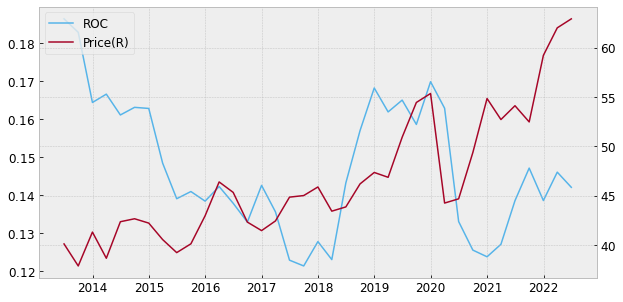

In [5]:
fs.draw_chart(df, left='ROC', right='Price')

In [10]:
# Magic formular
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)
s1 = {}
s2 = {}
s = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['PER'] = data[t]['Price_M2'] / data[t]['EPS']
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['Avg Current Liabilities'] = ( data[t]['Current Liabilities'] + data[prev_t]['Current Liabilities'] ) / 2
    data[t]['ROC'] = data[t]['EBIT'] / ( data[t]['Avg Assets'] - data[t]['Avg Current Liabilities'] )
    s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, cap=10, asc=True)
    s2[t] = fs.fn_score(data[t], by='ROC', method='relative', floor=0, asc=False)
    s[t] = fs.combine_score(s1[t], s2[t], n=30)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001, rf_rate=.01)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 4.79%
Accumulated return: 59.72%
Investment period: 10.0yrs
Sharpe ratio: 0.21
MDD: -53.14%


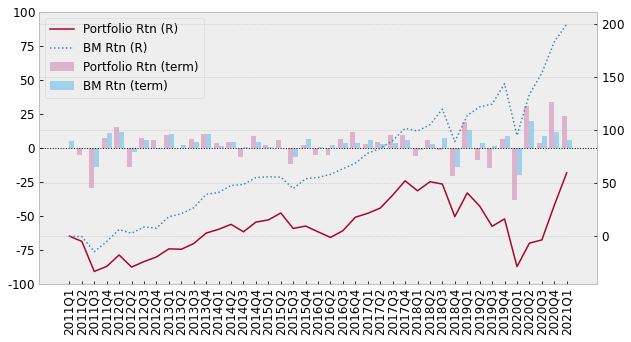

In [11]:
fs.draw_return(df)

In [12]:
# PBR + GP/A
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp=otp, term=t)
s = {}
s1 = {}
s2 = {}
signal = {}
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4)
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
    s1[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, cap=2, asc=True)
    s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
    s[t] = fs.combine_score(s1[t], s2[t], n=30)    
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001, rf_rate=.01)

CAGR: 21.35%
Accumulated return: 593.41%
Investment period: 10.0yrs
Sharpe ratio: 1.55
MDD: -44.32%


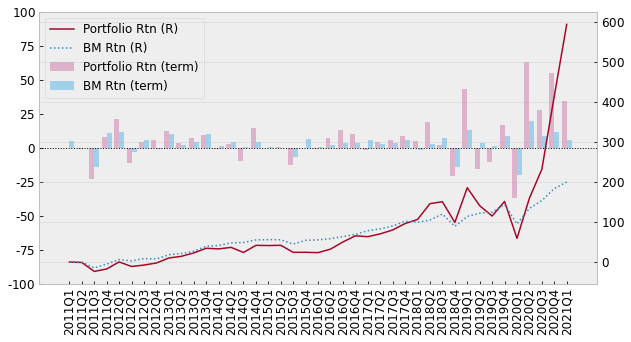

In [13]:
fs.draw_return(df)